<a href="https://colab.research.google.com/github/Source-lab1/Nandesh/blob/master/Iris_dataset_by_Navie_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import MultinomialNB 
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
df = pd.read_csv('Iris.csv')

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
df['Species'].value_counts()

3    50
2    50
1    50
Name: Species, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


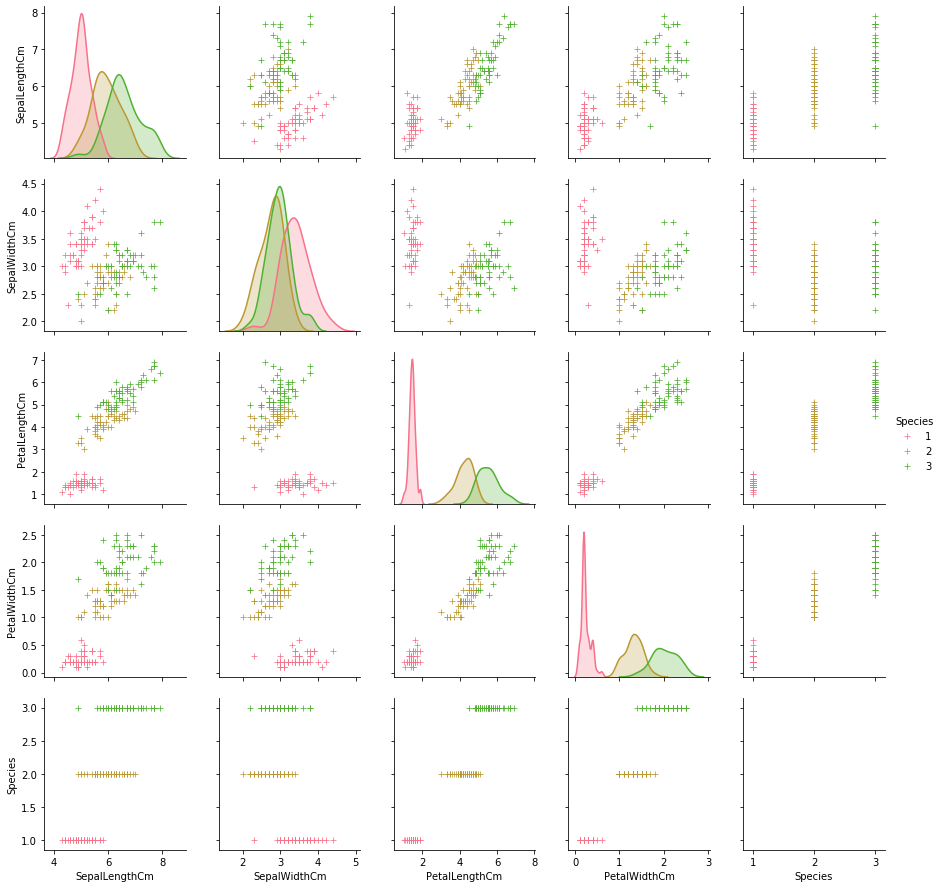

In [18]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

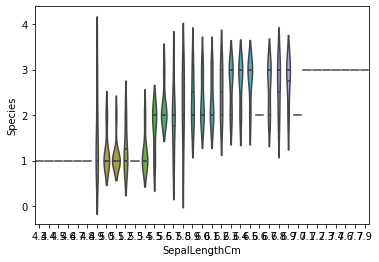

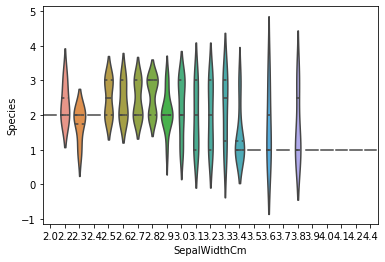

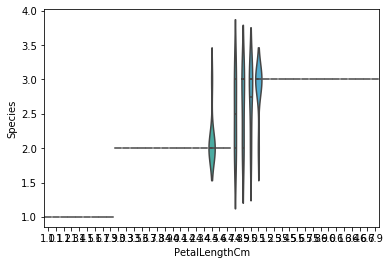

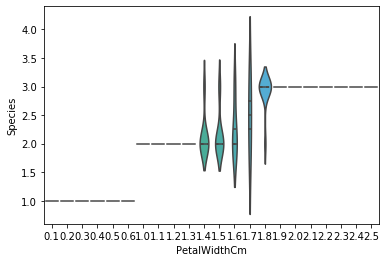

In [19]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [20]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


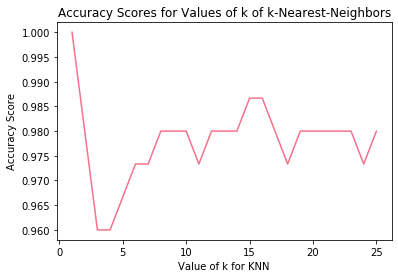

In [21]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [22]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


In [28]:
X = df.drop('Species', axis=1)   
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

model = MultinomialNB().fit(X_train, y_train)
 #Train the model on the training data 
y_pred = model.predict(X_test)
#Test the model on the testing data and comparing the result with the actual target. 
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

[[27  4  0]
 [ 0 23  6]
 [ 0  3 27]]
0.8555555555555555


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        31
           2       0.77      0.79      0.78        29
           3       0.82      0.90      0.86        30

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.86        90
weighted avg       0.86      0.86      0.86        90

